In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

file = "./database.csv"

In [2]:
df = pd.read_csv(file, low_memory=False)
df


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

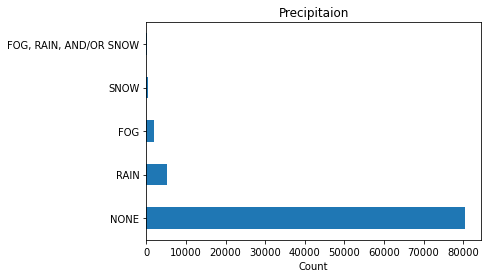

In [5]:
weather = ["FOG, RAIN, SNOW", "FOG, SNOW", "RAIN, SNOW", "FOG, RAIN", "SNOW", "FOG", "RAIN"]

df.loc[df['Precipitation']=='FOG, RAIN, SNOW','Precipitation'] = 'FOG, RAIN, AND/OR SNOW'
df.loc[df['Precipitation']=='FOG, SNOW','Precipitation'] = 'FOG, RAIN, AND/OR SNOW'
df.loc[df['Precipitation']=='RAIN, SNOW','Precipitation'] = 'FOG, RAIN, AND/OR SNOW'
df.loc[df['Precipitation']=='FOG, RAIN','Precipitation'] = 'FOG, RAIN, AND/OR SNOW'
# df.loc[df['Precipitation']=='SNOW','Precipitation'] = 'FOG, RAIN, AND/OR SNOW'
# df.loc[df['Precipitation']=='FOG','Precipitation'] = 'FOG, RAIN, AND/OR SNOW'
# df.loc[df['Precipitation']=='RAIN','Precipitation'] = 'FOG, RAIN, AND/OR SNOW'

df['Precipitation'].value_counts(ascending=False).head(20).plot(kind='barh', title='Precipitaion',)
plt.xlabel('Count')

plt.savefig("./Figures/Precipitation.png")

plt.show()


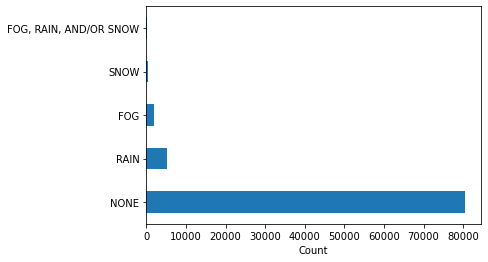

In [6]:
df['Precipitation'].value_counts(ascending=False).head(20).plot(kind='barh')
plt.xlabel('Count')
plt.show()

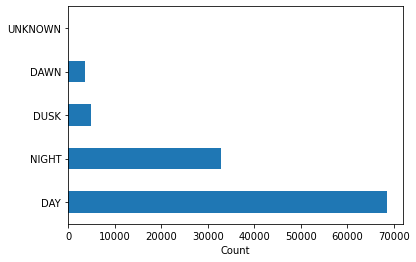

<Figure size 432x288 with 0 Axes>

In [7]:
df['Visibility'].value_counts(ascending=False).head(20).plot(kind='barh', )
plt.xlabel('Count')

plt.savefig("./Figures/Visibility.png")

plt.show()


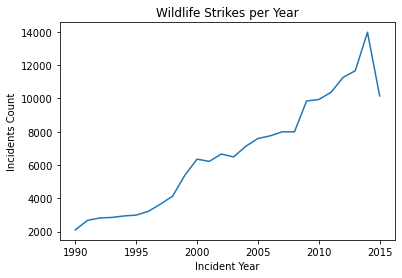

In [9]:
df.groupby('Incident Year').size().plot()
plt.ylabel("Incidents Count")
plt.title("Wildlife Strikes per Year")

plt.savefig("./Figures/strikersperyear(year).png")

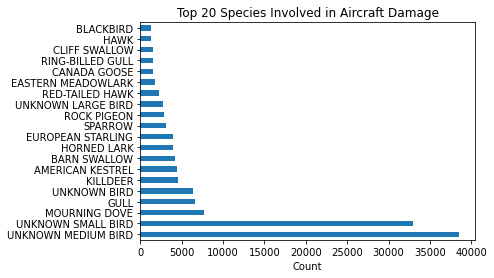

In [10]:
df['Species Name'].value_counts(ascending=False).head(20).plot(kind='barh', title='Top 20 Species Involved in Aircraft Damage',)
plt.xlabel('Count')

plt.savefig("./Figures/top20species.png")
plt.show()

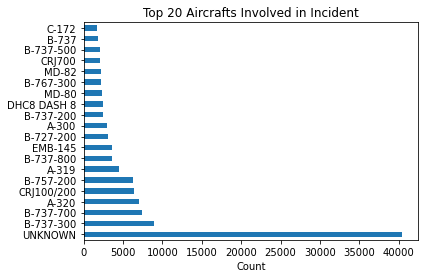

In [11]:
df['Aircraft'].value_counts(ascending=False).head(20).plot(kind='barh', title='Top 20 Aircrafts Involved in Incident',)
plt.xlabel('Count')
plt.savefig("./Figures/top20aircraft.png")
plt.show()

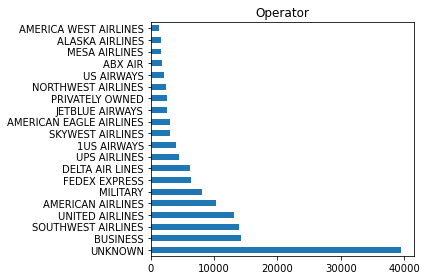

In [12]:
df['Operator'].value_counts(ascending=False).head(20).plot(kind='barh', title='Operator',)
plt.tight_layout()
plt.savefig("./Figures/top20operator.png")
plt.show()

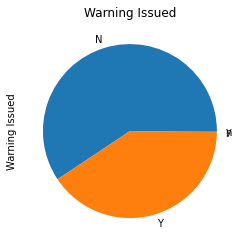

In [109]:
df['Warning Issued'].value_counts(ascending=False).head(20).plot(kind='pie', title='Warning Issued',)
plt.show()

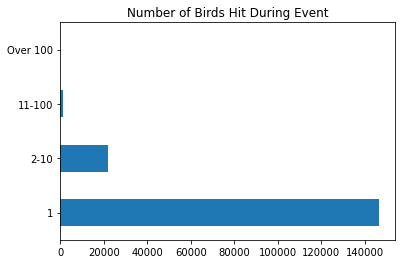

In [110]:
df['Species Quantity'].value_counts(ascending=False).head(20).plot(kind='barh', title='Number of Birds Hit During Event',)
plt.show()

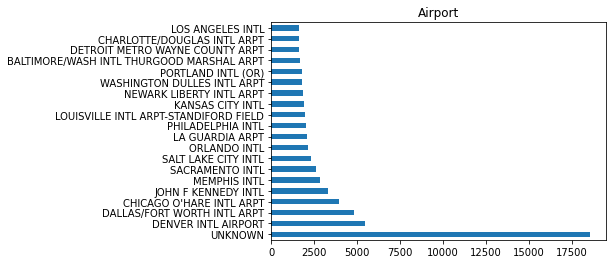

In [13]:
df['Airport'].value_counts(ascending=False).head(20).plot(kind='barh', title='Airport',)
plt.savefig("./Figures/top20airports.png")

plt.show()

In [14]:

df = df[df['Incident Year']!=2015]


days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
days_in_month_leap = [31,29,31,30,31,30,31,31,30,31,30,31]


years = []
months = []
incidents_in_month = []
days_in_months = []
incidents_in_year = []

for year in range(1990,2015):
    for month in range(1,13):
        df_month = df[(df['Incident Year']==year) & (df['Incident Month']==month)]
        incident_count = df_month.shape[0]
        years.append(year)
        months.append(month)
        incidents_in_month.append(incident_count)
        
        
        if year%4 == True:
            days_in_months.append(days_in_month_leap[month-1])
        else:
            days_in_months.append(days_in_month[month-1])

    df_month = df[(df['Incident Year']==year)]
    incident_count = df_month.shape[0]
        
    for i in range(0,12):
        incidents_in_year.append(incident_count)
 
        
data = pd.DataFrame({
            'Year': years,
            'Month': months,
            'incidents_in_month':incidents_in_month,
            'days_in_months':days_in_months,
            'incidents_in_year':incidents_in_year

    
}, )

    
data


,Year,Month,incidents_in_month,days_in_months,incidents_in_year
0,1990,1,36,31,2099
1,1990,2,31,28,2099
2,1990,3,32,31,2099
3,1990,4,63,30,2099
4,1990,5,230,31,2099
...,...,...,...,...,...
295,2014,8,2030,31,13976
296,2014,9,2064,30,13976
297,2014,10,1961,31,13976
298,2014,11,837,30,13976


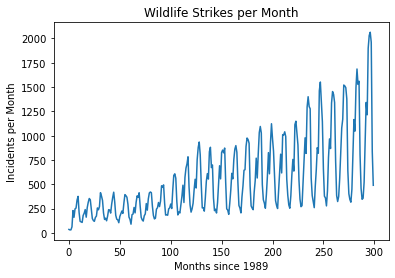

In [15]:
plt.plot(data.incidents_in_month)
plt.xlabel("Months since 1989")
plt.ylabel("Incidents per Month")
plt.title(("Wildlife Strikes per Month"))

plt.savefig("./Figures/strikespermonth.png")
plt.show()

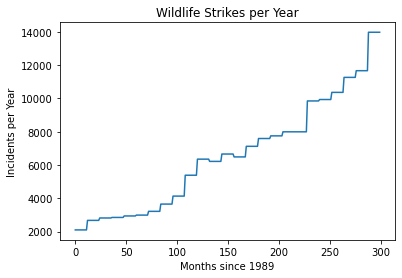

In [16]:
plt.plot(data.incidents_in_year)
plt.xlabel("Months since 1989")
plt.ylabel("Incidents per Year")
plt.title("Wildlife Strikes per Year")

plt.savefig("./Figures/strikersperyear(month).png")

plt.show()

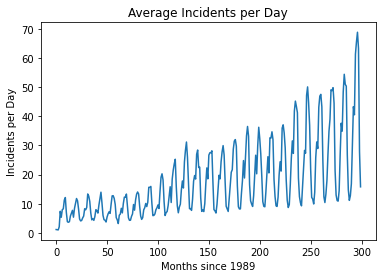

In [17]:
plt.plot(data.incidents_in_month/data.days_in_months)
plt.xlabel('Months since 1989')
plt.ylabel('Incidents per Day')
plt.title(('Average Incidents per Day'))

plt.savefig("./Figures/strikersperday.png")
plt.show()  

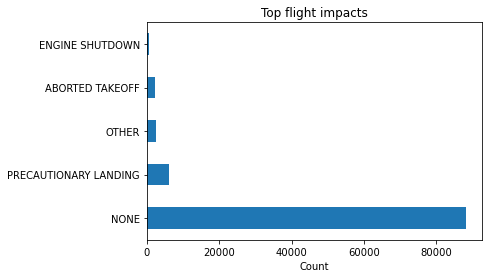

In [13]:
df.loc[df['Flight Impact']=='ENGINE SHUT DOWN','Flight Impact'] = 'ENGINE SHUTDOWN'


df['Flight Impact'].value_counts(ascending=False).plot(kind='barh', title='Top flight impacts',)
plt.xlabel('Count')

plt.savefig("./Figures/topflightimpacts.png")

plt.show()

In [215]:
contingencyTable = pd.crosstab(df['Precipitation'],df['Flight Impact'])
print(contingencyTable)
chi2(contingencyTable)

Flight Impact           ABORTED TAKEOFF  ENGINE SHUTDOWN   NONE  OTHER  \
Precipitation                                                            
FOG, RAIN, AND/OR SNOW              255               45   6374    153   
NONE                               1534              308  67855   1360   

Flight Impact           PRECAUTIONARY LANDING  
Precipitation                                  
FOG, RAIN, AND/OR SNOW                    381  
NONE                                     4367  


(84.2173519162471,
 2.2233051565416615e-17,
 4,
 array([[1.56054700e+02, 3.07922355e+01, 6.47500523e+03, 1.31979185e+02,
         4.14168651e+02],
        [1.63294530e+03, 3.22207765e+02, 6.77539948e+04, 1.38102082e+03,
         4.33383135e+03]]))

In [17]:
df['Flight Impact'].dropna().value_counts()

NONE                     88082
PRECAUTIONARY LANDING     6145
OTHER                     2423
ABORTED TAKEOFF           2352
ENGINE SHUTDOWN            463
Name: Flight Impact, dtype: int64

In [18]:
print(88082/99465)
print(6145/99465)
print(2423/99465)
print(2352/99465)
print(463/99465)

0.8855577338762378
0.06178052581310008
0.024360327753481122
0.023646508822198764
0.004654903734982154


In [224]:
df_2 = df[['Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike',
       'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Damage',
       'Tail Strike', 'Tail Damage', 'Lights Strike', 'Lights Damage',
       'Other Strike', 'Other Damage']]

df_2.dropna().head()



,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
df_2.sum()

Aircraft Damage         14969
Radome Strike           18761
Radome Damage            1593
Windshield Strike       24189
Windshield Damage        1037
Nose Strike             21305
Nose Damage              1145
Engine1 Strike           9681
Engine1 Damage           2515
Engine2 Strike           7864
Engine2 Damage           2023
Engine3 Strike            554
Engine3 Damage            169
Engine4 Strike            334
Engine4 Damage             74
Engine Ingested          9607
Propeller Strike         3497
Propeller Damage          579
Wing or Rotor Strike    20746
Wing or Rotor Damage     4180
Fuselage Strike         17881
Fuselage Damage           824
Landing Gear Strike      8051
Landing Gear Damage      1012
Tail Strike              1956
Tail Damage               727
Lights Strike            1038
Lights Damage             734
Other Strike            15796
Other Damage             1565
dtype: int64

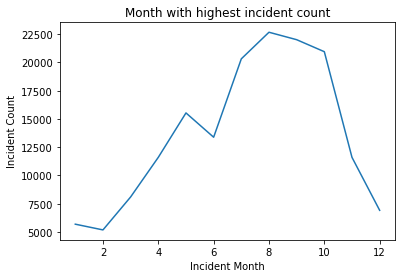

In [20]:
df.groupby('Incident Month').size().plot()
plt.ylabel('Incident Count')
plt.title('Month with highest incident count')

plt.savefig("./Figures/monthcount.png")